## 0. Unit conversion (*)
Create a class for converting US units to the metric system. It should have the following bound methods:

__init__ (self, value)

inch_to_cm(self)

foot_to_meters(self)

pound_to_kg(self)

__repr__(self)
Make sure that value is the correct type and format, raise suitable exceptions in case it isn't. Make value into property with getter and setter. Test your class manually by instantiating an object from it and test different methods. (*)



In [23]:
from numbers import Number

class Convertmeasure:

    def __init__(self, myval:int) -> None:
        self.myval=myval

    @property
    def myval(self)-> int:
        return self._myval
    
    @myval.setter
    def myval(self, value: int) -> None:
        if not isinstance(value, Number):
            raise TypeError(f"Value must be a number")
         
        # validation code goes here

        self._myval = value

    # see lecture note for prperty name validationchecking Name 
        
    def inch_cm(self) -> None:
        print(f"{self.myval} inches is {self.myval*2.56} cm")

    def fot_meter(self)->None:
        print(f"{self.myval} foot is {self.myval*0.3048} meter")

    def pound_kg(self) -> None:
        print(f"{self.myval} pound is {self.myval*0.45359237} kg")
        

p1=Convertmeasure(56)
p1.inch_cm()
p1.fot_meter()
p1.pound_kg()



56 inches is 143.36 cm
56 foot is 17.0688 meter
56 pound is 25.40117272 kg


## 1. Person (*)
Create a class named Person, with parameterized constructor with the following parameters:

name
age
email
Turn name, age, email into properties with following validations in their setters:

name - must be string
age - must be number between 0 and 125
email - must include an @ sign
It should also have __repr__ method to represent the Person class in a neat way.

Also create a method say_hello() that prints

Hi, my name is ..., I am ... years old, my email address is ... 

In [27]:
import re

class Person:
    def __init__(self, name: str, age:int, email: str) -> None:
        self.name=name
        self.age=age
        self.email=email
        
    @property
    def name(self)-> str:
        return self._name
    
    @property
    def age(self)-> int:
        return self._age
    
    @property
    def email(self)-> str:
        return self._email
    
    @age.setter
    def age(self, value: int) -> None:
        if not isinstance(value, Number):
            raise TypeError(f"Value must be a number")
        
        if value < 0 or value > 125:
            raise ValueError(
                f"Not Valid: age must be between 0 and 125"
            )
        self._age = value

    @name.setter
    def name(self, value: int) -> None:
        if not isinstance(value, str):
            raise TypeError(f"Value must be a string")
        self._name=value
    
    @email.setter
    def email(self, value: str) -> None:
        if not isinstance(value, str):
            raise TypeError(f"Value must be a string")
        regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b'
        if not (re.fullmatch(regex, value)):
            raise ValueError(
                f"Not Valid: age must be between 0 and 125"
            )
        self._email=value

    def __repr__(self) -> str:
        return f"Person {self.name} {self.age} {self.email}"
    
    def hello(self) -> str:
        return f"Hi, my name is {self.name}, I am {self.age} years old, my email address is {self.email}"
    

p1=Person("Kalle",33,"kalle.svensson@hotmail.com")
p1


Person Kalle 33 kalle.svensson@hotmail.com

In [29]:
p1.hello()

'Hi, my name is Kalle, I am 33 years old, my email address is kalle.svensson@hotmail.com'

## 2. Student and Teacher (*)
Create two classes named Student and Teacher that inherits from Person.

The Student class shall have:

study() method that prints out
study...study...study...more study
override say_hello() with the following message:
Yo, I am a student, my name is ..., I am ... years old, my email address is ...  
The Teacher class shall have:

teach() method that prints out
teach...teach...teach...more teaching
Instantiate a Teacher object and a Student object. Call

teach() and say_hello() methods from your Teacher object.
study() and say_hello() methods from your Student object

In [34]:
class Student(Person):
    def study(self) -> str:
        return f"study...study...study...more study"
    def hello(self) -> str:
        return f"Yo, I am a student, my name is {self.name}, I am {self.age} years old, my email address is {self.email}"
    
class Teatcher(Person):
    def teach(self) -> str:
        return f"teach...teach...teach...more teaching"

p2=Student("Olle", 25,"olle.banan@gmail.com")
p3=Teatcher("Knut",22, "knut.knutsson@gmail.com")

print(f"{p2.hello()}  and {p2.study()}")
print(f"{p3.hello()} and {p3.teach()}")


Yo, I am a student, my name is Olle, I am 25 years old, my email address is olle.banan@gmail.com  and study...study...study...more study
Hi, my name is Knut, I am 22 years old, my email address is knut.knutsson@gmail.com and teach...teach...teach...more teaching


## 3. Plotting library (**)
Create a class called PlotAnnotator which takes in a figure and axes instances and exposes a method called arrow, which serves the purpose of creating an annotation to a plot. Note that you might need other methods and/or properties, e.g. something that can return the figure instance.

Also add some settings so that you can reuse it for other plots. For simplicity you could have the settings directly in PlotAnnotator class, or if you'd like you could make use of inheritance or composition to separate concerns and make the classes have single responsibilities.

For example a manual test could look like this:

np.random.seed(42)
x = np.linspace(0, 10, 100) 
y = 2 * x + 5 + np.random.normal(0, 2, size=len(x)) 

annotate = AnnotatePlot(fig, ax)
annotate.arrow("Big dip here", (8, 10), (7.5, 14.8))

ValueError: not enough values to unpack (expected 2, got 1)

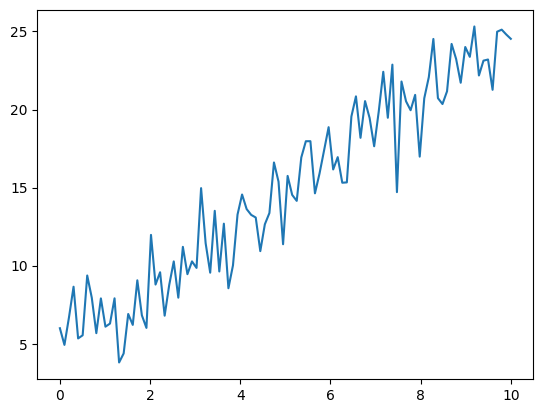

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.figure import Figure


class AnnotatePlot(Figure):
    def __init__(self, text: str, list1:[], list2: []) -> None:
        self.name=text
        self.list1=list1
        self.email=list2

np.random.seed(42)
x = np.linspace(0, 10, 100) 
y = 2 * x + 5 + np.random.normal(0, 2, size=len(x)) 
fig, ax=plt.plot(x,y)

annotate = AnnotatePlot(fig, ax)
annotate.arrow("Big dip here", (8, 10), (7.5, 14.8))